In [1]:
from nn import *
from Connect4 import Connect4Env
from Connect4_DQN import *

import torch

import gymnasium as gym 

import numpy as np 
import copy
from tqdm import trange

import matplotlib.pyplot as plt 

In [5]:
env = gym.make('Connect4-v0')
network = CNN_C()
#network.load_state_dict(torch.load('./weights/98wr_cnn_b.pt', map_location=network.device))

agent_params = dict(
    gamma=0.9, 
    epsilon=1.0, 
    batch_size=1024, 
    mem_size=100000, 
    eps_min=0.5, 
    eps_dec=1e-4
)

#agent = Agent(env, network, **agent_params)
print(f"Starting validation: {rand_validate(agent, env, 100) * 100:.1f}% WR")
for epoch in range(25) : 
    agent.train(100, n_replays=3)
    print(f"Epoch {epoch+1}: {rand_validate(agent, env, 100) * 100:.1f}% WR")

Validating: 100%|██████████| 100/100 [00:02<00:00, 49.61it/s]


Starting validation: 98.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 56.15it/s]


Epoch 1: 96.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 55.99it/s]


Epoch 2: 93.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 57.74it/s]


Epoch 3: 92.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 59.19it/s]


Epoch 4: 95.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 55.61it/s]


Epoch 5: 94.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 51.41it/s]


Epoch 6: 96.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 51.45it/s]


Epoch 7: 95.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 53.86it/s]


Epoch 8: 97.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 60.96it/s]


Epoch 9: 91.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 50.16it/s]


Epoch 10: 95.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 53.76it/s]


Epoch 11: 93.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 55.13it/s]


Epoch 12: 96.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 58.49it/s]


Epoch 13: 95.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 56.47it/s]


Epoch 14: 97.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 59.62it/s]


Epoch 15: 94.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 52.40it/s]


Epoch 16: 92.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 56.85it/s]


Epoch 17: 94.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 56.59it/s]


Epoch 18: 95.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 55.08it/s]


Epoch 19: 92.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 55.88it/s]


Epoch 20: 96.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 55.24it/s]


Epoch 21: 92.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 54.89it/s]


Epoch 22: 93.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 57.29it/s]


Epoch 23: 91.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 57.92it/s]


Epoch 24: 98.0% WR


Validating: 100%|██████████| 100/100 [00:01<00:00, 57.34it/s]

Epoch 25: 95.0% WR


### Analyzing weights

In [22]:
weights = agent.Q_eval.state_dict()

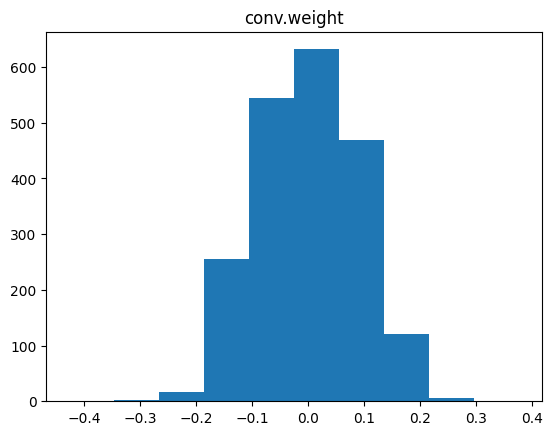

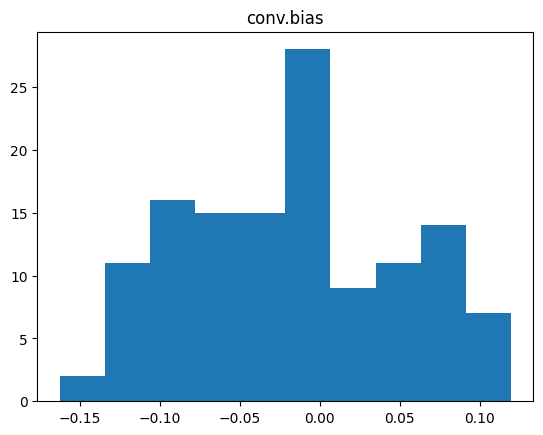

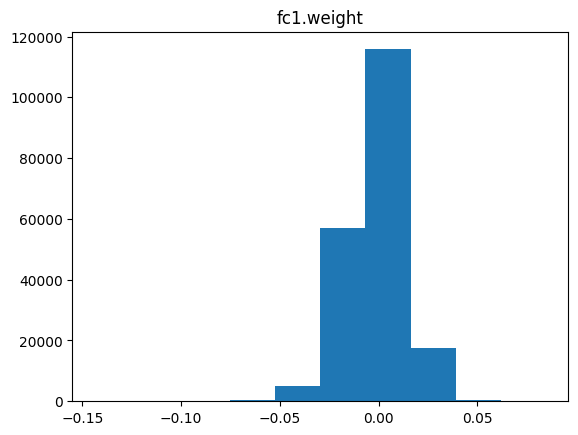

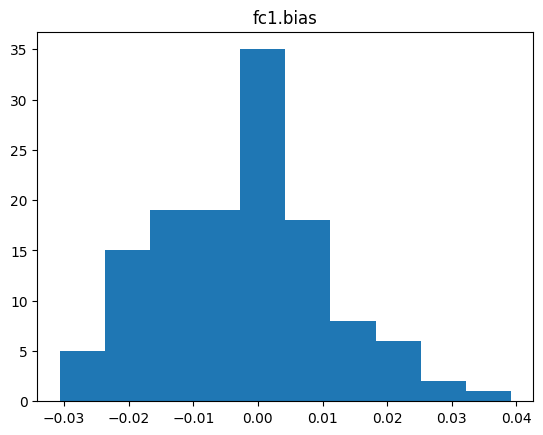

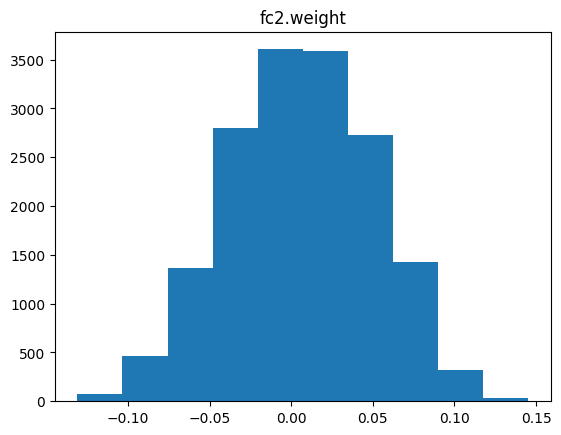

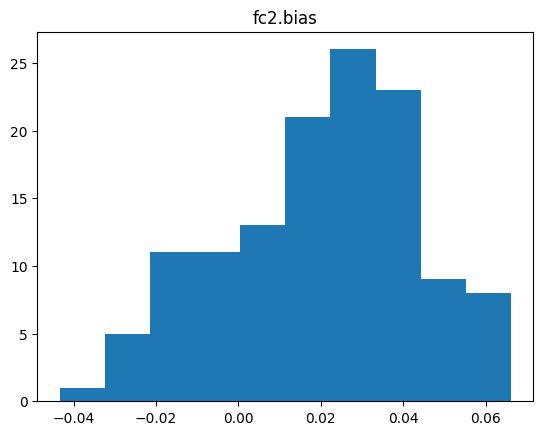

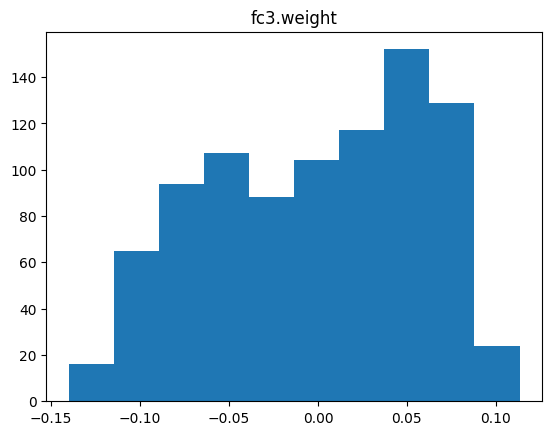

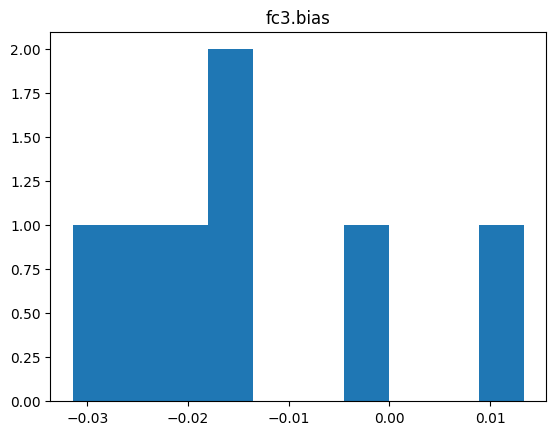

In [28]:
import matplotlib.pyplot as plt

for w in weights.keys() : 
    plt.hist(weights[w].detach().cpu().numpy().flatten())
    plt.title(w)
    plt.show()

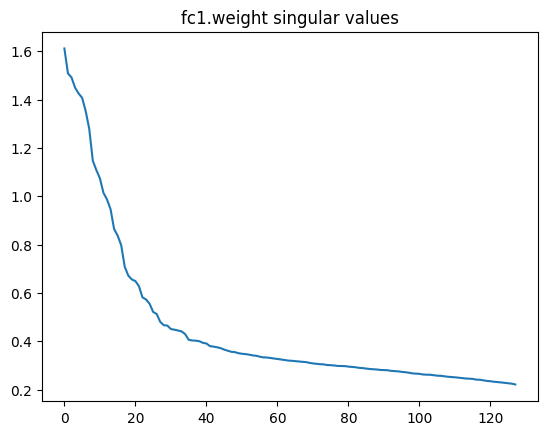

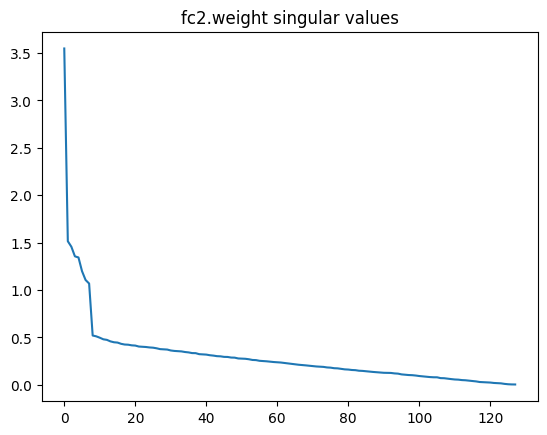

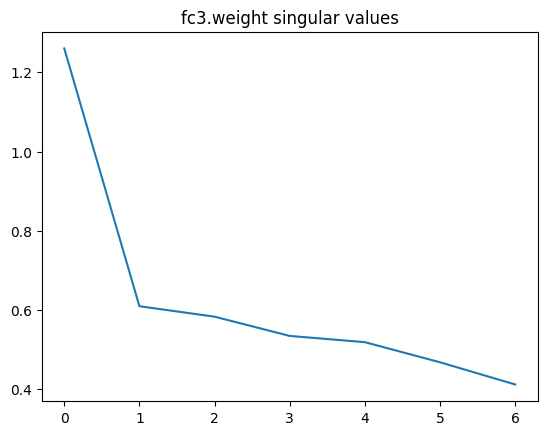

In [48]:
import regex as re 

for key in [k for k in weights.keys() if re.match(r"fc[0-9]\.weight", k)] : 
    w = weights[key].detach().cpu().numpy()
    _, S, _ = np.linalg.svd(w) 

    plt.plot(S)
    plt.title(f'{key} singular values')
    plt.show()

In [5]:
import plotly.express as px 

def plotbatch(batch) : 
    state_batch = agent.state_memory[batch]
    px.imshow(state_batch.reshape(-1, 6,7), animation_frame=0, color_continuous_scale=["blue", "white", "orange"], range_color=[-1,1]).show()